In [8]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from changepy import pelt


In [10]:
# making sure I can view data

# Basic CSV read
df = pd.read_csv(r'X:\RadcliffeE\for_MorganHampton_BoettcherScholar\Subject Case Data\IO_03_09_2023_RSTN\Processed DLC\csv folder\20230309_b1_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv', skiprows=1)

# Preview the data
print(df.head())


  bodyparts           PalmBase         PalmBase.1           PalmBase.2  \
0    coords                  x                  y           likelihood   
1         0  427.6842041015625  525.0423583984375  0.14588609337806702   
2         1  427.5551452636719  525.5269775390625   0.1911419928073883   
3         2  428.8374938964844  525.0931396484375  0.17686539888381958   
4         3  427.6429138183594  525.9227905273438   0.1331915706396103   

                 MCP1             MCP1.1               MCP1.2  \
0                   x                  y           likelihood   
1  410.07464599609375  512.4638061523438   0.3018750250339508   
2   416.3224182128906  519.0272827148438  0.33057689666748047   
3  416.42742919921875  514.6674194335938  0.28389057517051697   
4  416.71466064453125  518.5794677734375  0.37307292222976685   

                 MCP2             MCP2.1               MCP2.2  ...  \
0                   x                  y           likelihood  ...   
1      422.6220703125   

In [11]:
print(df.columns.tolist())


['bodyparts', 'PalmBase', 'PalmBase.1', 'PalmBase.2', 'MCP1', 'MCP1.1', 'MCP1.2', 'MCP2', 'MCP2.1', 'MCP2.2', 'MCP3', 'MCP3.1', 'MCP3.2', 'MCP4', 'MCP4.1', 'MCP4.2', 'MCP5', 'MCP5.1', 'MCP5.2', 'fTip1', 'fTip1.1', 'fTip1.2', 'fTip2', 'fTip2.1', 'fTip2.2', 'fTip3', 'fTip3.1', 'fTip3.2', 'fTip4', 'fTip4.1', 'fTip4.2', 'fTip5', 'fTip5.1', 'fTip5.2', 'MidForeArm', 'MidForeArm.1', 'MidForeArm.2', 'Elbow', 'Elbow.1', 'Elbow.2', 'MidUpperArm', 'MidUpperArm.1', 'MidUpperArm.2']


In [12]:
# storing variables of position as integers and rounding to 3 decimal places
x = pd.to_numeric(df['PalmBase'].iloc[1:], errors='coerce').dropna().round(5).astype(float)
y = pd.to_numeric(df['PalmBase.1'].iloc[1:], errors='coerce').dropna().round(5).astype(float)

# defining time
length = len(x)
# time step
step = 0.01 #  video frame rate = 100 fps, so the timestep b/t frames is 0.01 seconds or 10ms

t = np.arange(0, length * step, step)

In [13]:
print(x[:10])

1     427.68420
2     427.55515
3     428.83749
4     427.64291
5     426.92892
6     427.35242
7     427.55569
8     428.17410
9     428.32025
10    428.24515
Name: PalmBase, dtype: float64


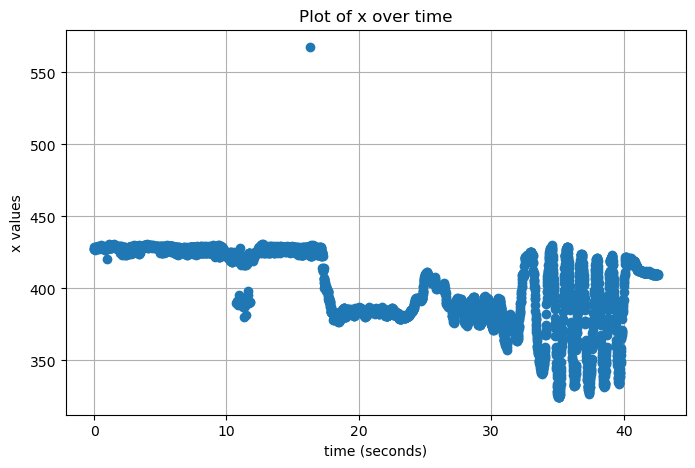

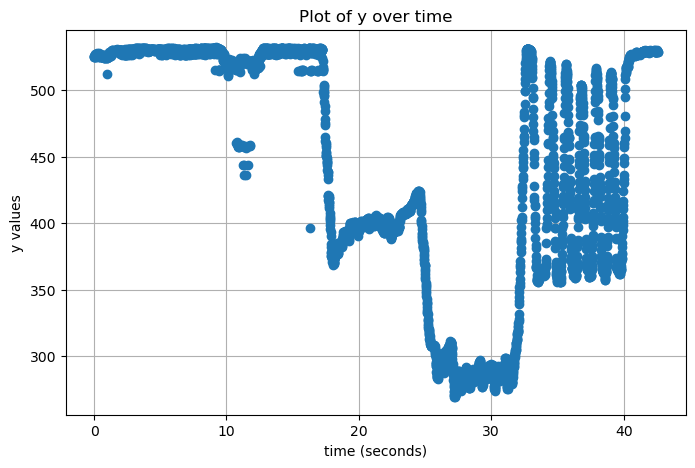

In [14]:
# First figure: plot t vs x
plt.figure(figsize=(8, 5))
plt.plot(t, x, 'o')  
plt.xlabel('time (seconds)')
plt.ylabel('x values')  
plt.title('Plot of x over time')
plt.grid(True)
plt.show()

# Second figure: plot t vs y
plt.figure(figsize=(8, 5))
plt.plot(t, y, 'o')  
plt.xlabel('time (seconds)')
plt.ylabel('y values')  
plt.title('Plot of y over time')
plt.grid(True)
plt.show()

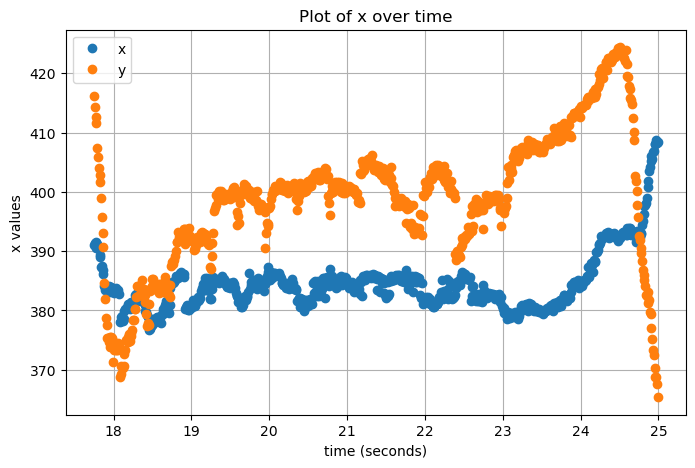

In [15]:
# First figure: plot t vs x
plt.figure(figsize=(8, 5))
plt.plot(t[1775:2500], x[1775:2500], 'o')  
plt.plot(t[1775:2500], y[1775:2500], 'o')  
plt.xlabel('time (seconds)')
plt.ylabel('x values')  
plt.legend(['x', 'y'])
plt.title('Plot of x over time')
plt.grid(True)
plt.show()

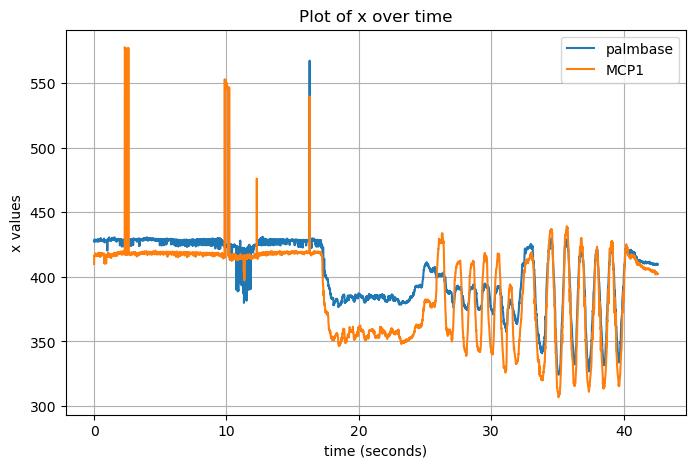

In [16]:
# storing variables of position as integers and rounding to 3 decimal places
x1 = pd.to_numeric(df['MCP1'].iloc[1:], errors='coerce').dropna().round(5).astype(float)
y1 = pd.to_numeric(df['MCP1.1'].iloc[1:], errors='coerce').dropna().round(5).astype(float)

# First figure: plot t vs x
plt.figure(figsize=(8, 5))
plt.plot(t, x)  
plt.plot(t, x1)  
plt.xlabel('time (seconds)')
plt.ylabel('x values')  
plt.legend(['palmbase', 'MCP1'])
plt.title('Plot of x over time')
plt.grid(True)
plt.show()

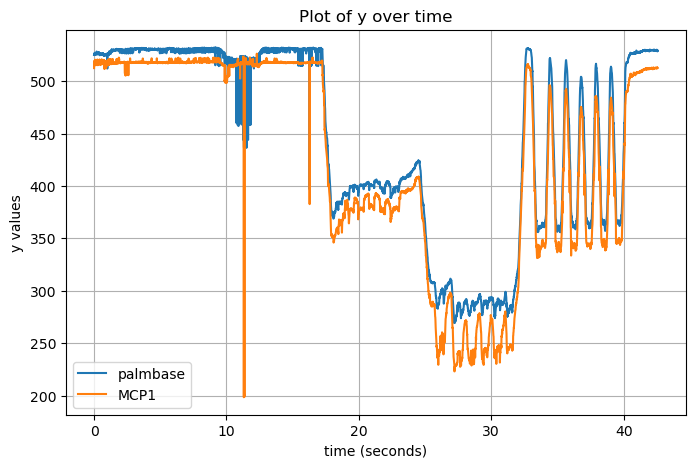

In [17]:
# First figure: plot t vs x
plt.figure(figsize=(8, 5))
plt.plot(t, y)  
plt.plot(t, y1)  
plt.xlabel('time (seconds)')
plt.ylabel('y values')  
plt.legend(['palmbase', 'MCP1'])
plt.title('Plot of y over time')
plt.grid(True)
plt.show()

Detected change points: [1745, 2515, 3210, 3245, 3325, 3420, 3475, 3545, 3595, 3655, 3710, 3770, 3825, 3885, 3930, 4005, 4258]


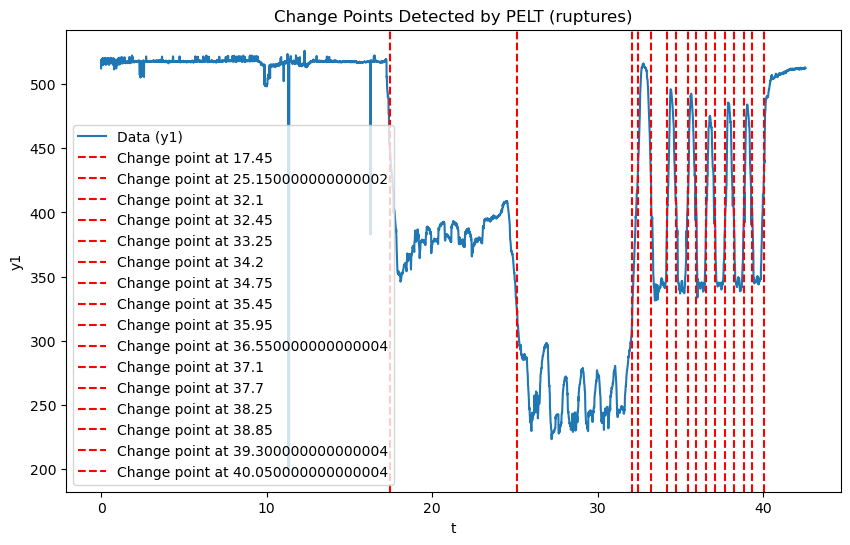

In [34]:
import ruptures as rpt
import matplotlib.pyplot as plt

# Assuming t and y1 are pandas Series or lists
# Convert y1 to numpy array
y1_np = y1.to_numpy() if hasattr(y1, 'to_numpy') else y1

# Run PELT on numpy array
algo = rpt.Pelt(model="l2").fit(y1_np)
result = algo.predict(pen=100000)

print("Detected change points:", result)

# Plot your data with change points
plt.figure(figsize=(10, 6))
plt.plot(t, y1, label='Data (y1)')
for cp in result:
    if cp < len(t):
        plt.axvline(t[cp], color='r', linestyle='--', label=f'Change point at {t[cp]}')

plt.title('Change Points Detected by PELT (ruptures)')
plt.xlabel('t')
plt.ylabel('y1')
plt.legend()
plt.show()


In [ ]:
b1f = dataframes['b1f']

# Extract first 4 columns
X = b1f.iloc[:, :]



In [ ]:
b1f = dataframes['b1f']

# Extract first 4 columns
X = b1f.iloc[:, :4]

# standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, perplexity=2, learning_rate='auto', init='pca', random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Get the original column names (for labeling)
labels = X.columns

plt.figure(figsize=(12, 5))

# PCA Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
for i, label in enumerate(labels):
    plt.text(X_pca[i, 0]+0.02, X_pca[i, 1]+0.02, label, fontsize=12)
plt.title("PCA of Features")

# t-SNE Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1])
for i, label in enumerate(labels):
    plt.text(X_tsne[i, 0]+0.02, X_tsne[i, 1]+0.02, label, fontsize=12)
plt.title("t-SNE of Features")

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Select first 4 columns as features
X = b1f.iloc[:, :4]
feature_names = X.columns.tolist()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA and t-SNE
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Prepare DataFrames for plotting
import pandas as pd

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
tsne_df = pd.DataFrame(X_tsne, columns=['tSNE1', 'tSNE2'])

# Add original features to these DataFrames for coloring
for feat in feature_names:
    pca_df[feat] = b1f[feat].values
    tsne_df[feat] = b1f[feat].values

# Plot PCA colored by each feature
plt.figure(figsize=(16, 12))
for i, feat in enumerate(feature_names, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=feat, palette='viridis', legend=False)
    plt.title(f'PCA colored by {feat}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

# Plot t-SNE colored by each feature
for i, feat in enumerate(feature_names, 1):
    plt.subplot(2, 4, i + 4)
    sns.scatterplot(x='tSNE1', y='tSNE2', data=tsne_df, hue=feat, palette='viridis', legend=False)
    plt.title(f't-SNE colored by {feat}')
    plt.xlabel('tSNE1')
    plt.ylabel('tSNE2')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# STEP 1: Split odd and even columns into X and Y
x_cols = b1f.columns[::2]  # odd-numbered = X columns
y_cols = b1f.columns[1::2]  # even-numbered = Y columns

# STEP 2: Combine each X and Y column into one feature vector
keypoint_features = []

for x_col, y_col in zip(x_cols, y_cols):
    xy = pd.concat([b1f[x_col], b1f[y_col]], axis=1)  # Combine x and y for this keypoint
    keypoint_features.append(xy.T)  # Transpose so each row is one keypoint

# STEP 3: Stack all keypoints into one DataFrame
keypoints_df = pd.concat(keypoint_features, keys=x_cols).reset_index(level=1, drop=True)

# STEP 4: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(keypoints_df)

# STEP 5: PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# STEP 6: Plot with labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='skyblue')

# Label with keypoint names (using X column names as IDs)
for i, label in enumerate(x_cols):
    plt.text(X_pca[i, 0] + 0.02, X_pca[i, 1] + 0.02, label, fontsize=9)

plt.title("PCA on (X, Y) Keypoints")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


## Ross's code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##Change these to your path and whatever you want the origin to be. 
file_path = "/Users/ross/Desktop/PD26Analysis/pose-3d/20240205_PD26_session001_-0000DLC_Resnet50_pdredoJun20shuffle1_snapshot_010.csv"  
origin_marker = "stable"  

df = pd.read_csv(file_path, header=[0, 1, 2])
df.columns = df.columns.get_level_values(0)  # Flatten multi-index

##This part sets the origin from which the movement is defined. I have this set to my tagged stable point but theoretically should be able to use any defined point. 
origin_coords = df[[f"{origin_marker}_x", f"{origin_marker}_y", f"{origin_marker}_z"]].astype(float).iloc[0].to_numpy()

M_cols = ['M_00', 'M_01', 'M_02',
          'M_10', 'M_11', 'M_12',
          'M_20', 'M_21', 'M_22']
M = df[M_cols].iloc[0].astype(float).to_numpy().reshape(3, 3)

markers = sorted(set(col.split('_')[0] for col in df.columns if col.endswith('_x')))

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for marker in markers:
    try:
        marker_xyz = df[[f"{marker}_x", f"{marker}_y", f"{marker}_z"]].astype(float).to_numpy()
        relative_xyz = marker_xyz - origin_coords  
        transformed_xyz = (M @ relative_xyz.T).T  
        ax.plot(transformed_xyz[:, 0], transformed_xyz[:, 1], transformed_xyz[:, 2], label=marker)
    except Exception as e:
        print(f"Skipping {marker} due to error: {e}")


ax.set_title("Trajectories)")
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlabel("Z (mm)")
ax.legend()
ax.view_init(elev=20, azim=120)
plt.tight_layout()
plt.show()